# Data Analysis and Preparation

### Importando as bibliotecas, carregando e verificando os dados

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Usando o comando info para verificar os tipos de dados, o shape do dataset, a quantidade de dados nulos

* A coluna bmi possui alguns valores faltantes

In [4]:
# Transformar a idade em int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Verificando a quantidade de valores nulos no dataset e quantidade de registros duplicados

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.duplicated().sum()

0

### Verificando se existem colunas categoricas com apenas 1 valor ou com muitos valores

In [7]:
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() == 1:
        print("{} has only one value.".format(col))

In [8]:
thresh = 0.5
for col in data.select_dtypes(include=['object']).columns:
    pct_tot_unique = data[col].nunique()/data.shape[0]
    if pct_tot_unique >= thresh:
        print("{} has {}% of unique values".format(col, pct_tot_unique*100))

## Exploratory Data Analysis

### Análise descritiva básica

In [9]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


Anotações da análise descritiva básica
* O dataset possui 3 gêneros (verificar esse terceiro) - apenas 1 registro com Other removido
* O dataset possui idades menores que 1 ano, analisar quantas são, verificar qual a influência na label
    * 43 registros com idade menor que 1 ano, nenhum com caso de AVC
* Hypertension e heart_disease possuem ao menos 75% dos valores em 0
* ever_married tem 2 valores ('yes' e 'no') que podem ser substituídos por 0 e 1 (feito)
* Ver o value_counts e plotar histograma para work_type, Residence_type e smoking_status (feito)
* Pesquisar sobre o bmi, seus thresholds e classificações. 
    * Talvez criar uma coluna que indica se a pessoa está ou não acima do peso
    * Inputação dos dados faltantes
* A feature stroke é a label. (feito)
    * Desbalanceada: Verificar a utilização de técnicas de balanceamento
    * Pelo menos 75% dos registros em 0
    * Verificar as correlações com as outras features.
    * Realizar análise para os registros de cada classe
        * Ajuda a entender como as classes são separáveis.

### Analisando a label

* Proporção da label em aproximadamente 95/5
* A correlação de pearson com todas as variáveis numéricas é desprezível.
* Para age, a classe 1 tem a maioria dos registros acima de 50 anos.
* Para avg_glucose_level, a classe 1 tem um pico acima de 150 que a classe 0 não tem.
* As chances de ter derrame são maiores para quem tem hipertensão e problemas cardíacos.
* As chances de derrames são maiores em homens, autônomos, que moram na zona urbana e que fumam ou já fumaram antes

In [10]:
data['stroke'].value_counts(1)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [11]:
data.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

In [12]:
data[data['stroke'] == 0].describe()[['age', 'avg_glucose_level', 'bmi']].T

,count,mean,std,min,25%,50%,75%,max
age,4861.0,41.971545,22.291940,0.08,24.00,43.00,59.00,82.00
avg_glucose_level,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
bmi,4700.0,28.823064,7.908287,10.30,23.40,28.00,33.10,97.60


In [13]:
data[data['stroke'] == 1].describe()[['age', 'avg_glucose_level', 'bmi']].T

,count,mean,std,min,25%,50%,75%,max
age,249.0,67.728193,12.727419,1.32,59.00,71.00,78.00,82.00
avg_glucose_level,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74
bmi,209.0,30.471292,6.329452,16.90,26.40,29.70,33.70,56.60


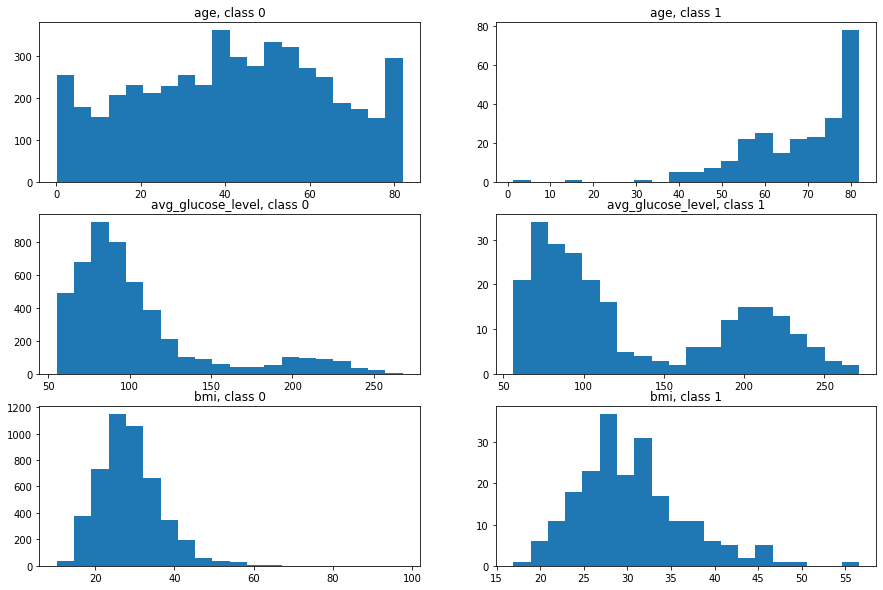

In [14]:
fig, ax = plt.subplots(3,2, figsize=(15, 10))

ax[0][0].hist(data[data['stroke'] == 0].age, bins=20)
ax[0][0].set_title("age, class 0")

ax[0][1].hist(data[data['stroke'] == 1].age, bins=20)
ax[0][1].set_title("age, class 1")

ax[1][0].hist(data[data['stroke'] == 0].avg_glucose_level, bins=20)
ax[1][0].set_title("avg_glucose_level, class 0")

ax[1][1].hist(data[data['stroke'] == 1].avg_glucose_level, bins=20)
ax[1][1].set_title("avg_glucose_level, class 1")

ax[2][0].hist(data[data['stroke'] == 0].bmi, bins=20)
ax[2][0].set_title("bmi, class 0")

ax[2][1].hist(data[data['stroke'] == 1].bmi, bins=20)
ax[2][1].set_title("bmi, class 1")

plt.show()

In [15]:
# Transformando a coluna 'ever_married' para fazer as análises
data['ever_married'] = data['ever_married'].replace({'Yes': 1, 'No': 0})

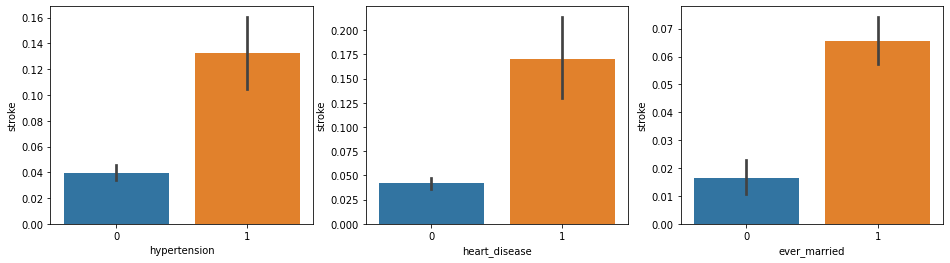

In [16]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(16,4))

sns.barplot(x='hypertension', y='stroke', data=data, ax=axis1)
sns.barplot(x='heart_disease', y='stroke', data=data, ax=axis2)
sns.barplot(x='ever_married', y='stroke', data=data, ax=axis3)

plt.show()

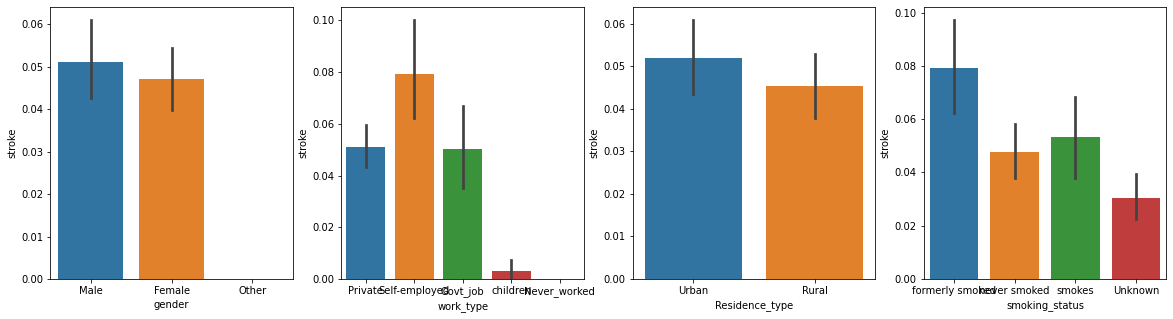

In [17]:
fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(20,5))

sns.barplot(x='gender', y='stroke', data=data, ax=axis1)
sns.barplot(x='work_type', y='stroke', data=data, ax=axis2)
sns.barplot(x='Residence_type', y='stroke', data=data, ax=axis3)
sns.barplot(x='smoking_status', y='stroke', data=data, ax=axis4)

plt.show()

In [18]:
# Remoção da única linha com o gênero Other
data.drop(3116, inplace=True)
data.reset_index(inplace=True)

In [23]:
data[data.age < 1].shape

(43, 13)

### Heatmap de correlações

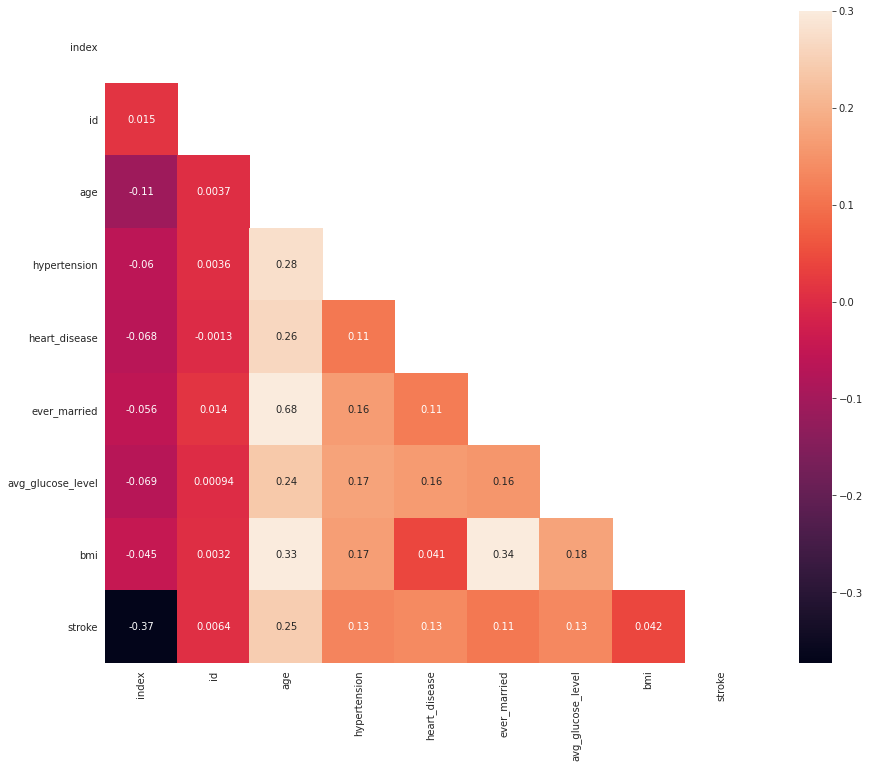

In [34]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)